In [30]:
#Import library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

Import library yang diperlukan untuk melakukan analisis dataset perumahan di Boston.

In [3]:
#Import dataset 
df = pd.read_excel('Dataset Gelombang A.xlsx')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Import dataset perumahan di Boston yang diberikan.

In [7]:
#Memahami informasi dataset dan tipe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Memahami informasi terkait dataset yang diantaranya berisi baris, kolom, dan tipe data.

In [8]:
#Buatkan deskripsi yang didalamnya terdapat mean dan median dari dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Memahami deskripsi dari dataset yang diberikan didalamnya terdapat infomasi terkait mean, median, min, dan max dari keseluruhan data 

In [6]:
#Mencari nilai-nilai yang hilang
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Berdasarkan hasil dari perintah yang dijalankan didapatkan bahwa tidak terdapat nilai-nilai yang hilang.

In [9]:
df.duplicated().sum()

0

Berdasarkan hasil dari perintah yang dijalankan didapatkan bahwa tidak terdapat nilai-nilai yang terduplikasi.

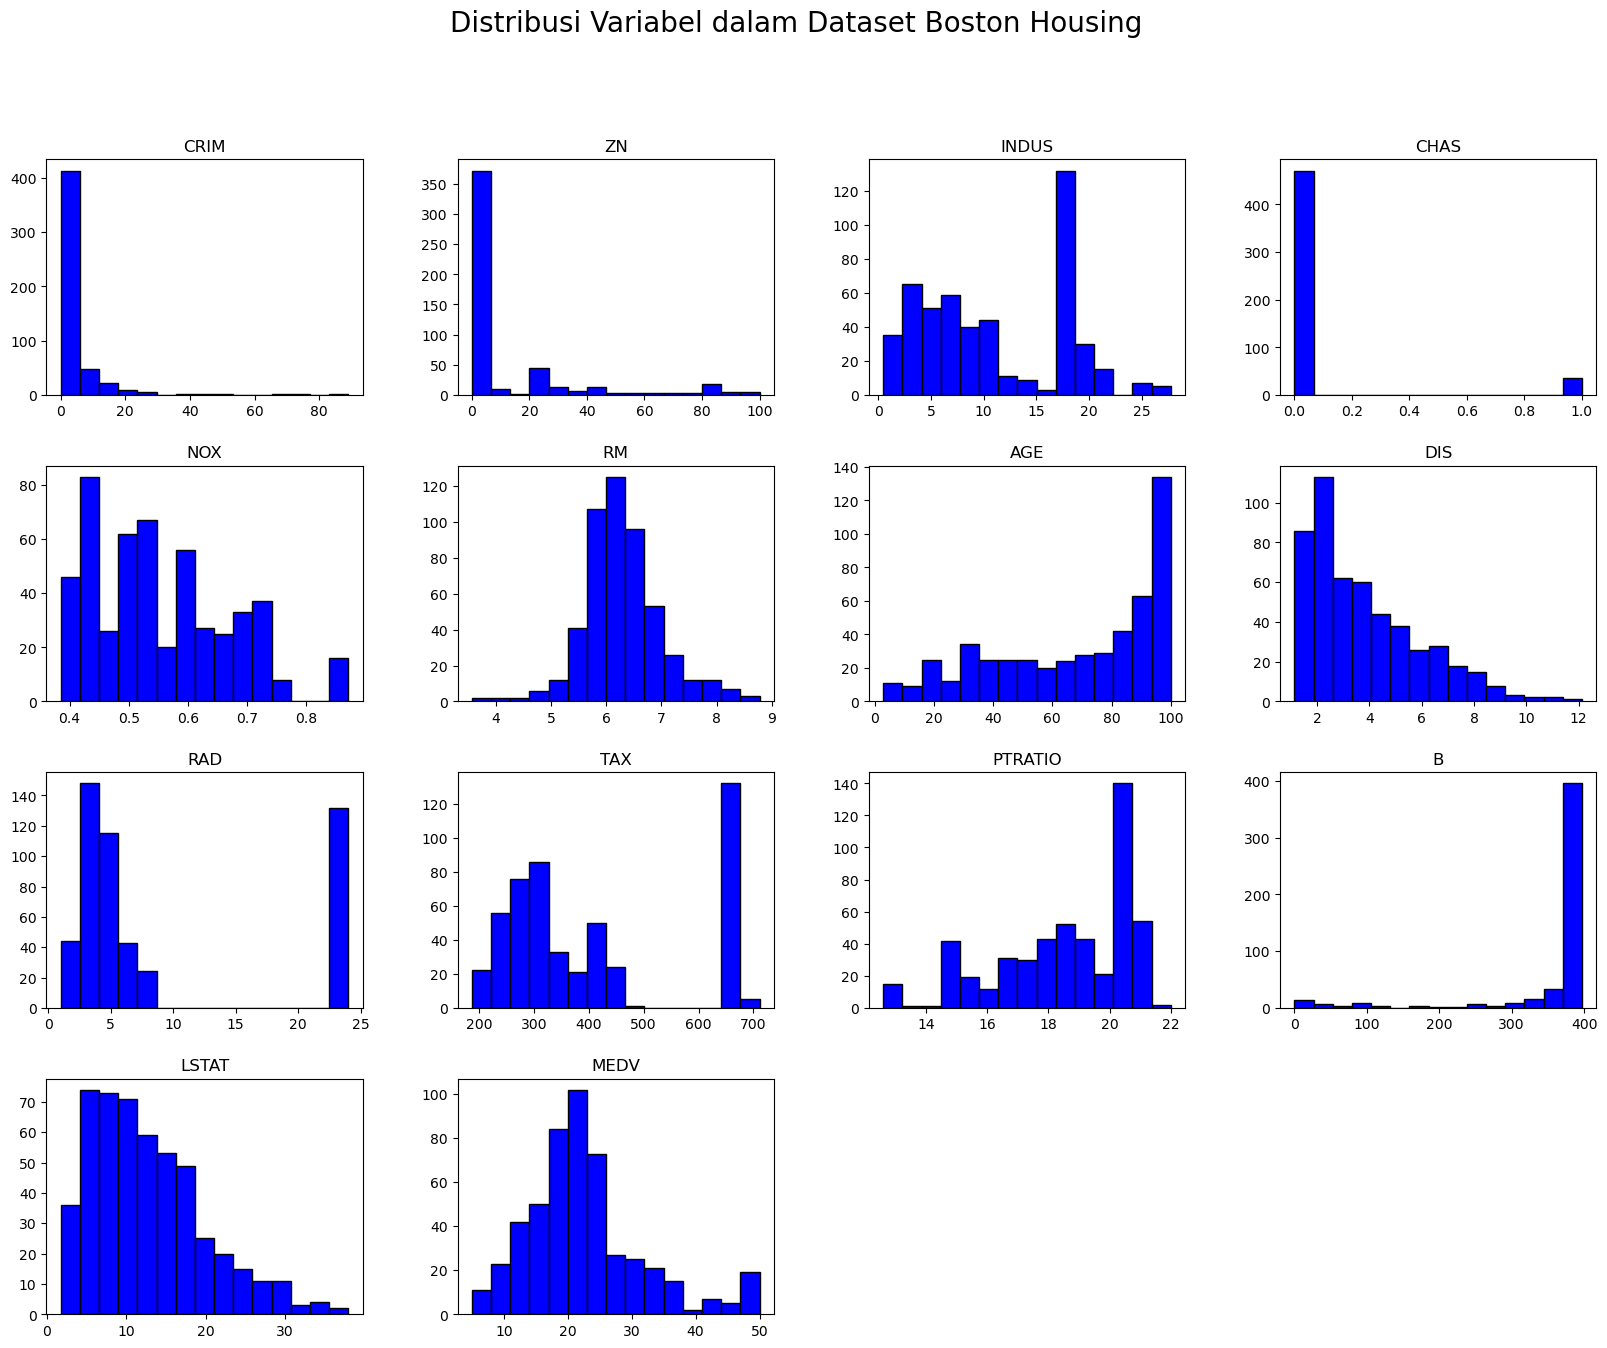

In [ ]:
# Membuatkan histogram visualisasi dari statistik deskriptif
descriptive_stats = df.describe()
df.hist(bins=5, figsize=(20, 15), edgecolor='black', color='blue', grid=False)
plt.suptitle("Distribusi Variabel dalam Dataset Boston Housing", fontsize=20)
plt.show()

Berdasarkan pengamatan dari visualisasi data berbagai variabel diatas didapatkan kesimpulan sebagai berikut, CRIM: Tingkat kejahatan bervariasi dari 0.0063 hingga 88.97, dengan rata-rata 3.61. RM (jumlah kamar): Rata-rata 6.28 kamar per rumah dengan maksimum 8.78 dan minimum 3.56. MEDV (target): Nilai median rumah berkisar antara 5.000 hingga 50.000, dengan rata-rata 22.53 ribu. Selanjutnya, distribusi Variabel MEDV memiliki distribusi terpotong di 50.000, yang kemungkinan merupakan batas maksimum pada data.

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

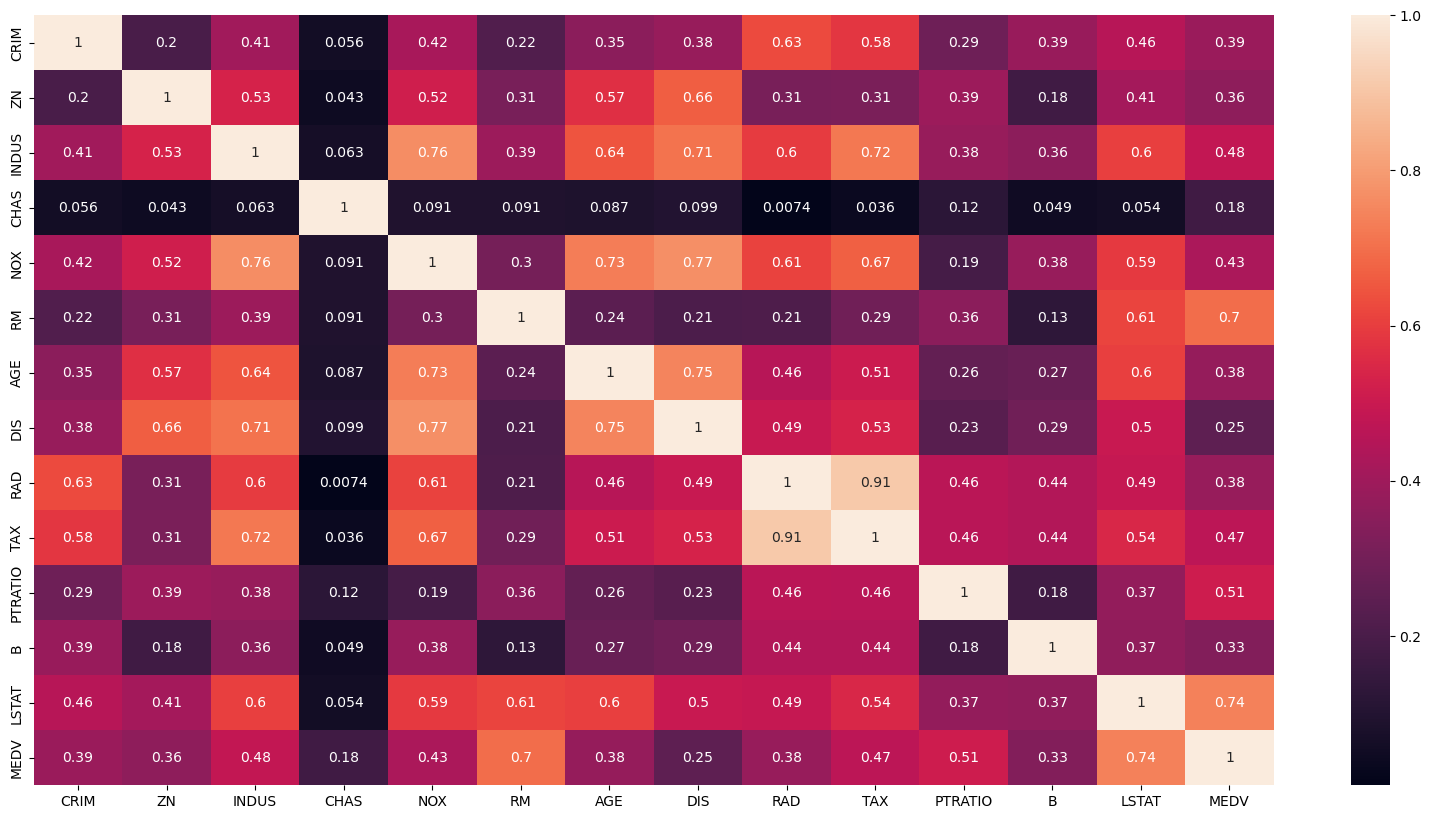

In [32]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

Berdasarkan pengamatan dari heatmap correlation didapatkan kesimpulan korelasi variabel sebagai berikut, Variabel yang memiliki korelasi positif kuat dengan MEDV yaitu RM (jumlah kamar): 
Variabel dengan Korelasi positif yang tinggi (0.695) Rumah dengan lebih banyak kamar cenderung lebih mahal serta ZN dan B memiliki korelasi positif moderat, masing-masing 0.360 dan 0.333. 
Variabel dengan korelasi negatif yang kuat dengan MEDV yakni LSTAT (status sosial ekonomi rendah): Korelasi negatif paling kuat (-0.738), menunjukkan bahwa kawasan dengan status sosial ekonomi rendah cenderung memiliki rumah lebih murah dan PTRATIO (rasio siswa-guru): Korelasi negatif (-0.508), menunjukkan daerah dengan rasio siswa-guru tinggi memiliki harga rumah lebih rendah.
Variabel lain dengan korelasi negatif sedang: NOX, INDUS, dan TAX.

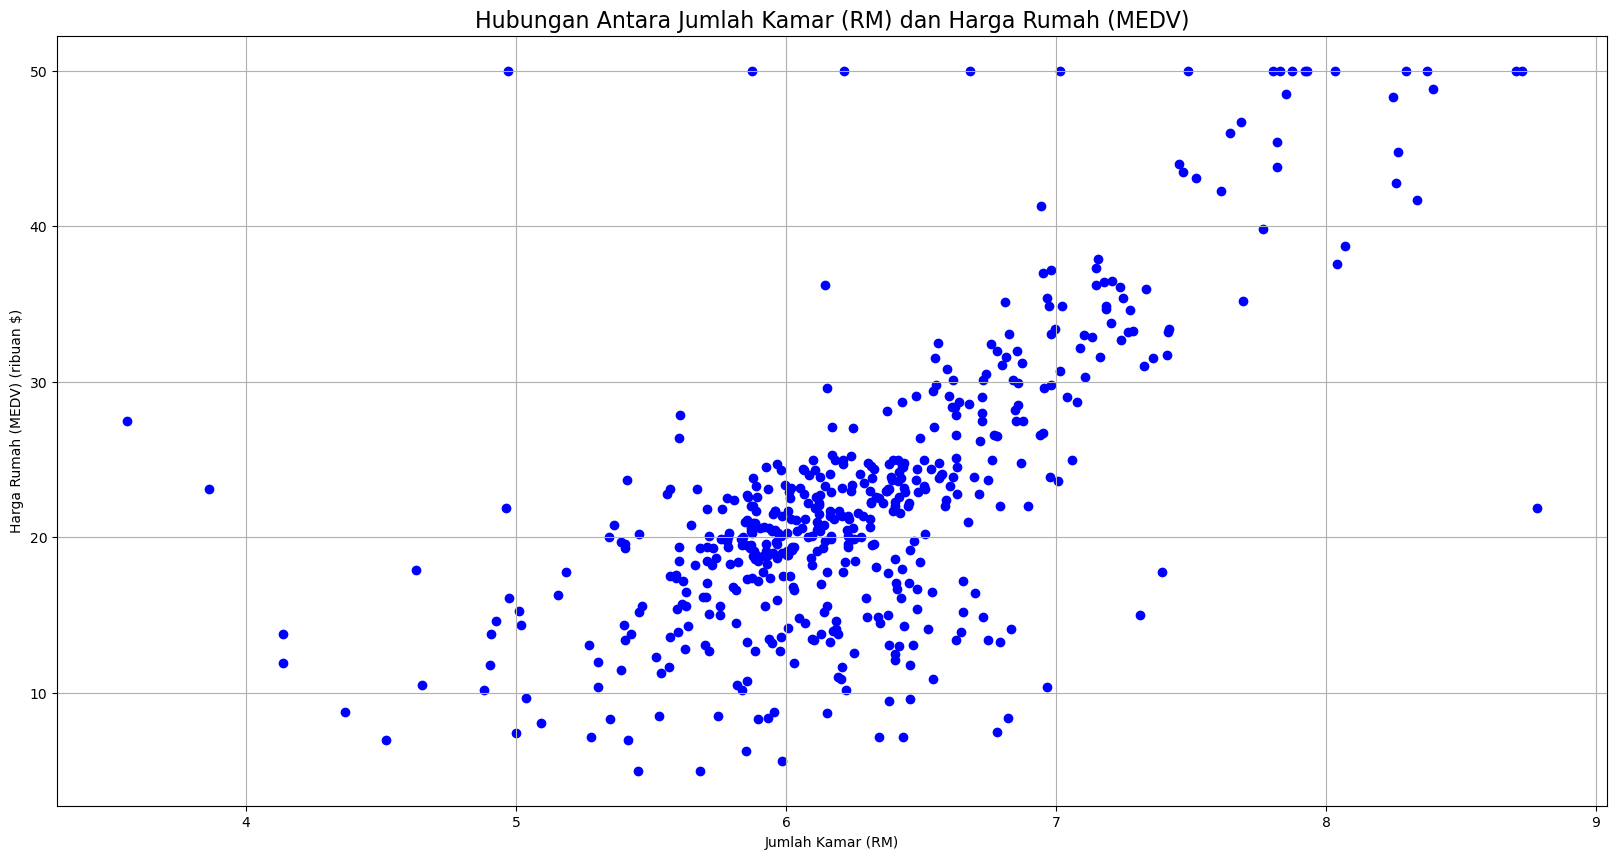

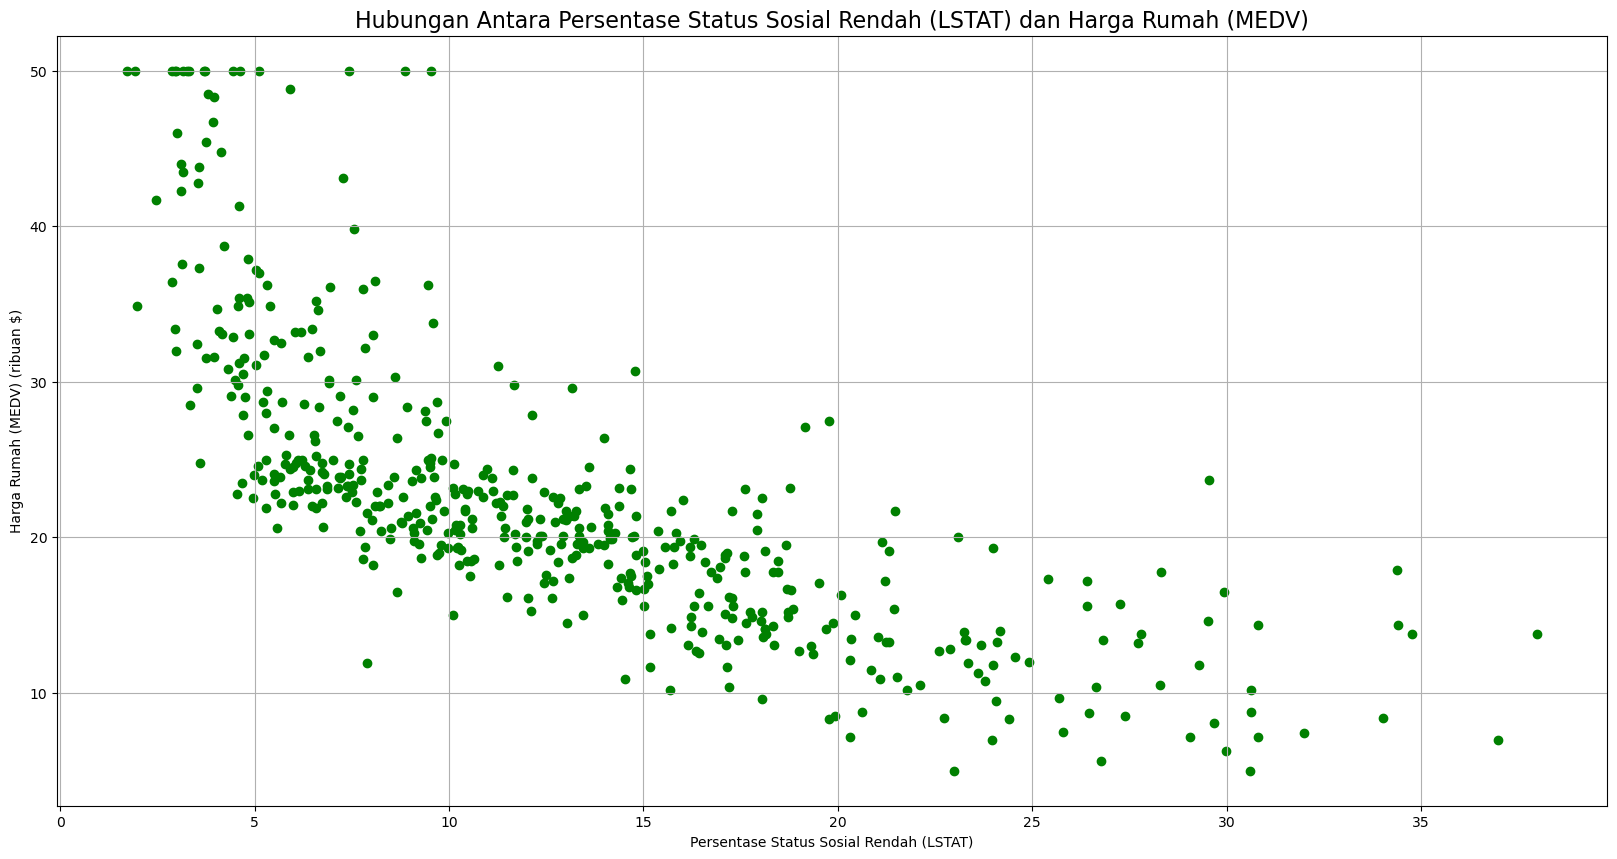

In [54]:
# Scatter plot MEDV vs RM
plt.figure(figsize=(20, 10))
plt.scatter(data=df, x="RM", y="MEDV", color="blue")
plt.title("Hubungan Antara Jumlah Kamar (RM) dan Harga Rumah (MEDV)", fontsize=16)
plt.xlabel("Jumlah Kamar (RM)")
plt.ylabel("Harga Rumah (MEDV) (ribuan $)")
plt.grid(True)
plt.show()

# Scatter plot MEDV vs LSTAT
plt.figure(figsize=(20, 10))
plt.scatter(data=df, x="LSTAT", y="MEDV", color="green")
plt.title("Hubungan Antara Persentase Status Sosial Rendah (LSTAT) dan Harga Rumah (MEDV)", fontsize=16)
plt.xlabel("Persentase Status Sosial Rendah (LSTAT)")
plt.ylabel("Harga Rumah (MEDV) (ribuan $)")
plt.grid(True)
plt.show()

Hubungan antara jumlah kamar (RM) dan harga rumah (MEDV) :Terlihat bahwa ada hubungan positif yang kuat antara jumlah kamar dan harga rumah. Ketika jumlah kamar (RM) meningkat, harga rumah (MEDV) juga cenderung meningkat. Ini menunjukkan bahwa rumah dengan lebih banyak kamar biasanya memiliki harga yang lebih tinggi. Hal ini mungkin mencerminkan permintaan yang lebih besar untuk rumah yang lebih besar, yang biasanya lebih dihargai di pasar perumahan.
Hubungan antara persentase status sosial rendah (LSTAT) dan harga rumah (MEDV) :Menunjukkan hubungan negatif yang jelas. Ketika persentase populasi berstatus rendah (LSTAT) meningkat, harga rumah (MEDV) cenderung menurun. Ini menunjukkan bahwa daerah dengan lebih banyak populasi berstatus rendah cenderung memiliki harga rumah yang lebih rendah. Hal ini mungkin mencerminkan faktor-faktor sosial dan ekonomi yang mempengaruhi nilai properti, di mana daerah dengan lebih banyak permasalahan berkaitan ekonomi mungkin memiliki harga rumah yang lebih rendah.

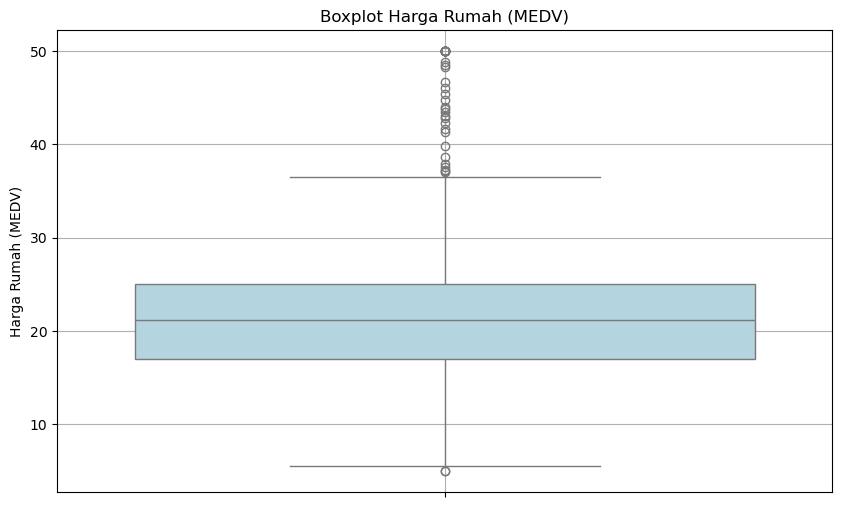

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='MEDV', color='lightblue')
plt.title('Boxplot Harga Rumah (MEDV)')
plt.ylabel('Harga Rumah (MEDV)')
plt.grid(True)
plt.show()

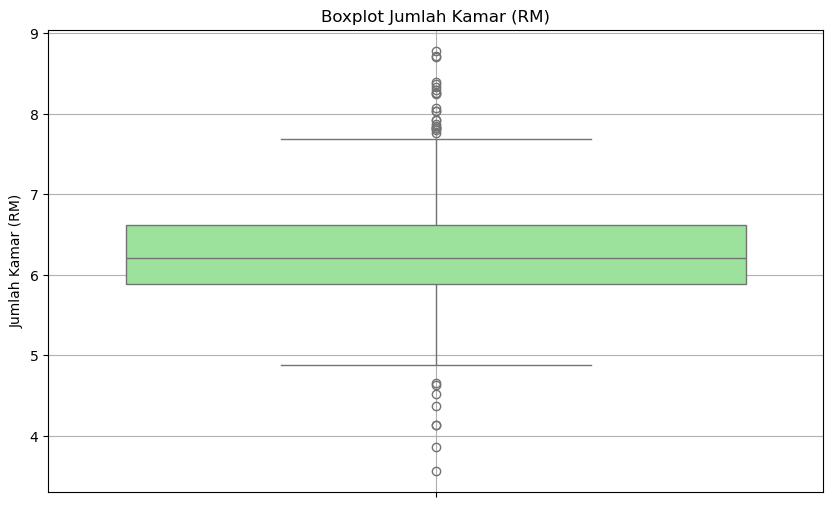

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='RM', color='lightgreen')
plt.title('Boxplot Jumlah Kamar (RM)')
plt.ylabel('Jumlah Kamar (RM)')
plt.grid(True)
plt.show()

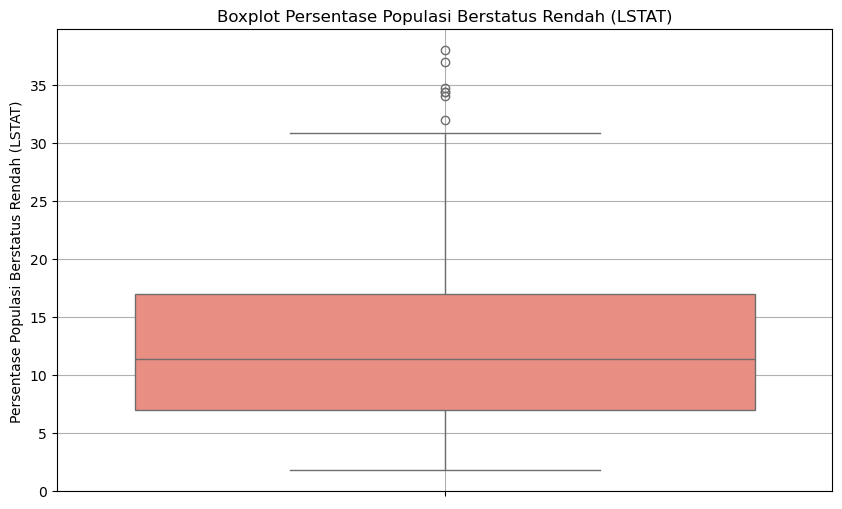

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='LSTAT', color='salmon')
plt.title('Boxplot Persentase Populasi Berstatus Rendah (LSTAT)')
plt.ylabel('Persentase Populasi Berstatus Rendah (LSTAT)')
plt.grid(True)
plt.show()

Boxplot digunakan untuk dengan mudah mengidentifikasi outlier dalam dataset Boston Housing. Outlier ini dapat memberikan wawasan tentang data yang tidak biasa atau ekstrem yang mungkin mempengaruhi analisis lebih lanjut. 
Berdasarkan boxplot diatas didapatkan kesimpulan sebagai berikut 
MEDV (Harga Rumah): Boxplot ini akan menunjukkan apakah ada nilai harga rumah yang jauh lebih tinggi atau lebih rendah dibandingkan dengan rentang interkuartil. Outlier biasanya ditunjukkan sebagai titik-titik di luar whiskers.
RM (Jumlah Kamar): Boxplot ini membantu mengidentifikasi apakah ada rumah dengan jumlah kamar yang sangat tinggi atau sangat rendah yang mungkin dianggap outlier.
LSTAT (Persentase Populasi Berstatus Rendah): Boxplot ini akan menunjukkan apakah ada daerah dengan persentase populasi berstatus rendah yang sangat tinggi atau sangat rendah.
Outlier harus dianalisis lebih lanjut untuk menentukan apakah mereka perlu dihapus, dipertahankan, atau ditangani dengan cara lain dalam analisis dan pemodelan. Mereka bisa jadi merupakan nilai yang valid yang mencerminkan realitas pasar, atau bisa juga merupakan kesalahan pengukuran atau data yang tidak akurat.

Setelah membuatkan grafik yang relevan, seperti bar chart, line chart, scatter plot, dan sebagainya, untuk memberikan gambaran visual mengenai karakteristik data dan hubungannya. Maka, langkah berikutnya adalah mengidentifikasi variabel terikat (dependent variable) dan variabel bebas (independent variable(s)) yang ingin dianalisis. Dan menggunakan teknik regresi linier untuk melakukan analisis prediktif berdasarkan variabel-variabel independen yang relevan dalam dataset.

Setelah mengidentifikasi variabel terikat (dependent variable) dan variabel bebas (independent variables), saya mengelompokkan variabelnya sebagai berikut .
Variabel terikat (Dependent Variable) terdiri dari MEDV yakni Harga rumah di Boston (dalam ribuan dolar).
Variabel bebas (Independent Variables) terdiri dari CRIM - Tingkat kejahatan per kapita, ZN - Proporsi lahan residensial yang zonasi untuk lebih dari 25.000 kaki persegi, INDUS - proporsi hektar bisnis non-ritel per kota, HAS - Variabel dummy Sungai Charles (1 jika batas wilayah sungai; 0 jika tidak), NOX - Konsentrasi oksida nitrat (bagian per 10 juta), RM - Jumlah rata-rata kamar per hunian, AGE - Proporsi unit yang ditempati pemilik yang dibangun sebelum tahun 1940, DIS - Jarak tertimbang ke lima pusat ketenagakerjaan Boston, RAD - Indeks aksesibilitas ke jalan raya radial, TAX - Tarif pajak properti bernilai penuh per $10.000, PTRATIO - Rasio murid-guru menurut kota, B - 1000(Bk - 0,63)^2 di mana Bk adalah proporsi penduduk kulit hitam menurut kota, dan LSTAT - % status populasi yang lebih rendah.

In [60]:
def linear_regression_function(x, w, b):
    y_hat = w * x + b 
    return y_hat

In [61]:
def cost_function(x, y, w, b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m) :
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        total_cost += cost
    total_cost = total_cost / (2 * m)
    return total_cost

In [62]:
def Z_Score(X):
    mu = np.mean(X)
    sigma = np.std(X)
    Z = (X - mu)/sigma
    return Z, mu, sigma

In [69]:
RM = df['RM'].to_numpy().astype(float)
MEDV= df['MEDV'].to_numpy().astype(float)
print(f'Nilai dari jumlah kamar adalah: \n {RM}')
print(f'Nilai dari rumah adalah: \n {MEDV}')

Nilai dari jumlah kamar adalah: 
 [6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066

In [70]:
print(f'Dimensi dari jumlah kamar adalah: {RM.shape}')
print(f'Dimensi dari harga rumah adalah: {MEDV.shape}')
print(f'Jumlah data (m) adalah: {RM.shape[0]}')

Dimensi dari jumlah kamar adalah: (506,)
Dimensi dari harga rumah adalah: (506,)
Jumlah data (m) adalah: 506


In [71]:
max_RM = max(RM)
min_RM = min(RM)
range_min_max = max_RM - min_RM
print(f' Jangkauan nilai jumlah kamar adalah {range_min_max}')

 Jangkauan nilai jumlah kamar adalah 5.218999999999999


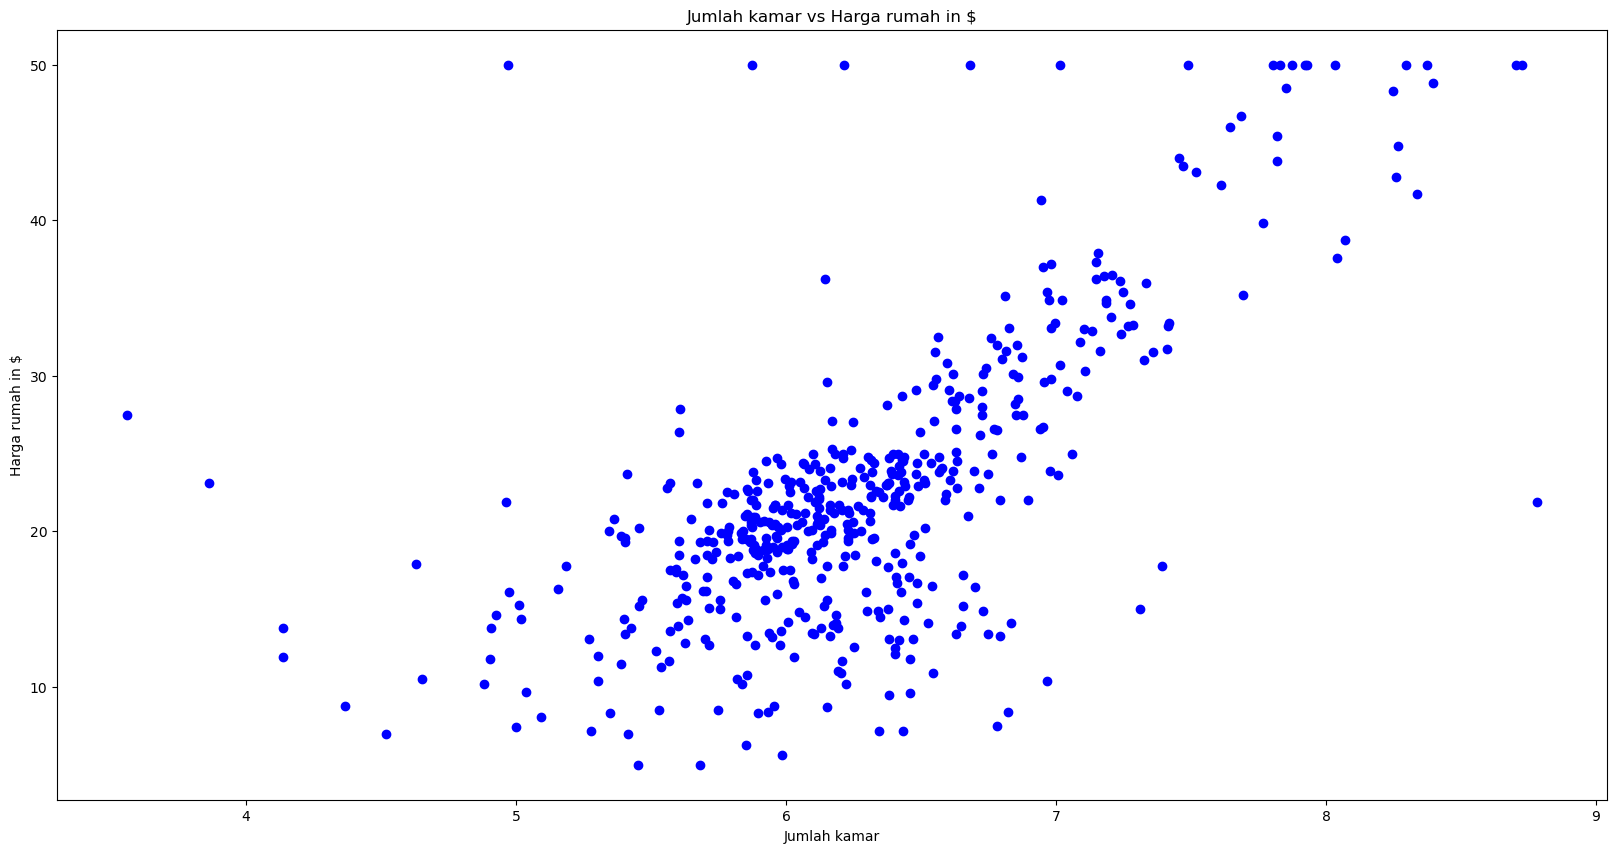

In [99]:
plt.figure(figsize=(20, 10))
plt.scatter(RM, MEDV, marker='o', c='blue')
plt.title('Jumlah kamar vs Harga rumah in $')
plt.xlabel('Jumlah kamar')
plt.ylabel('Harga rumah in $')
plt.show()

In [78]:
RM_norm, mean, std = Z_Score(RM)
print(f' Hasil normalisasi jumlah kamar adalah \n {RM_norm}\n',
      f' Rata-rata jumlah kamar adalah {mean}\n',
      f'Standar deviasi jumlah kamar adalah {std}')

 Hasil normalisasi jumlah kamar adalah 
 [ 4.13671889e-01  1.94274453e-01  1.28271368e+00  1.01630251e+00
  1.22857665e+00  2.07096381e-01 -3.88410945e-01 -1.60465557e-01
 -9.31205901e-01 -3.99808215e-01  1.31589471e-01 -3.92684921e-01
 -5.63643963e-01 -4.78164442e-01 -2.68739617e-01 -6.42000190e-01
 -4.98109663e-01 -4.19753436e-01 -1.18052117e+00 -7.94438668e-01
 -1.01811008e+00 -4.55369903e-01 -2.03205317e-01 -6.71918022e-01
 -5.13780909e-01 -9.76794979e-01 -6.71918022e-01 -3.38547892e-01
  2.99699195e-01  5.54713098e-01 -8.14383890e-01 -3.02931425e-01
 -4.76739783e-01 -8.31479794e-01 -2.68739617e-01 -5.00958981e-01
 -6.32027579e-01 -6.19205651e-01 -4.53945244e-01  4.42165063e-01
  1.05334363e+00  6.91480331e-01 -1.64739533e-01 -1.04903869e-01
 -3.07205401e-01 -8.58548308e-01 -7.10383806e-01 -3.62767089e-01
 -1.26172671e+00 -9.72521003e-01 -4.58219220e-01 -2.41671102e-01
  3.22493734e-01 -4.08356167e-01 -5.65068621e-01  1.37389184e+00
  1.40137423e-01  7.57014630e-01 -1.98931341e-01 

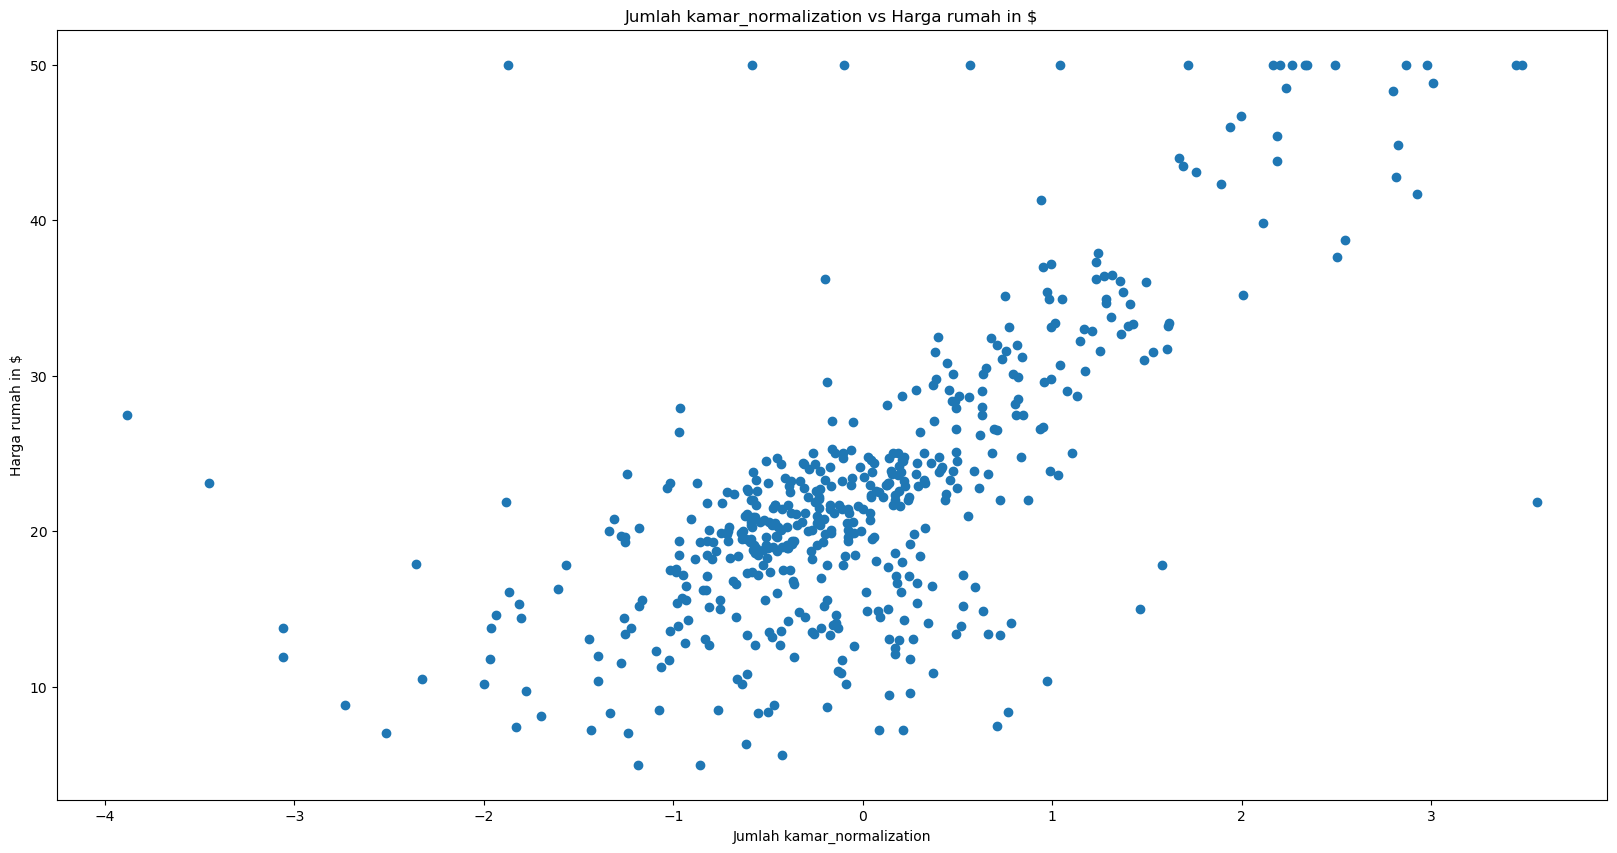

In [100]:
plt.figure(figsize=(20, 10))
plt.scatter(RM_norm, MEDV)
plt.title('Jumlah kamar_normalization vs Harga rumah in $')
plt.xlabel('Jumlah kamar_normalization')
plt.ylabel('Harga rumah in $')
plt.show()

In [83]:
jumlah_kamar_norm_reshape = RM_norm.reshape(-1,1)
reg = LinearRegression()
reg.fit(jumlah_kamar_norm_reshape, MEDV)
w_final = reg.coef_
b_final = reg.intercept_
print(f'w = {w_final}')
print(f'b = {b_final}')
print(reg)

w = [6.38897522]
b = 22.532806324110677
LinearRegression()


In [84]:
lreg = linear_regression_function(RM_norm, w_final, b_final)
print(lreg)

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.58705086
 20.53367019 22.17204981 22.42690886 22.54523628 22.48152152 21.21632837
 22.05372239 18.79516738 26.55926634 25.57623857 22

In [85]:
print(f'Hasil cost function adalah: {cost_function(RM, MEDV, w_final, b_final)}')

Hasil cost function adalah: [829.72020796]


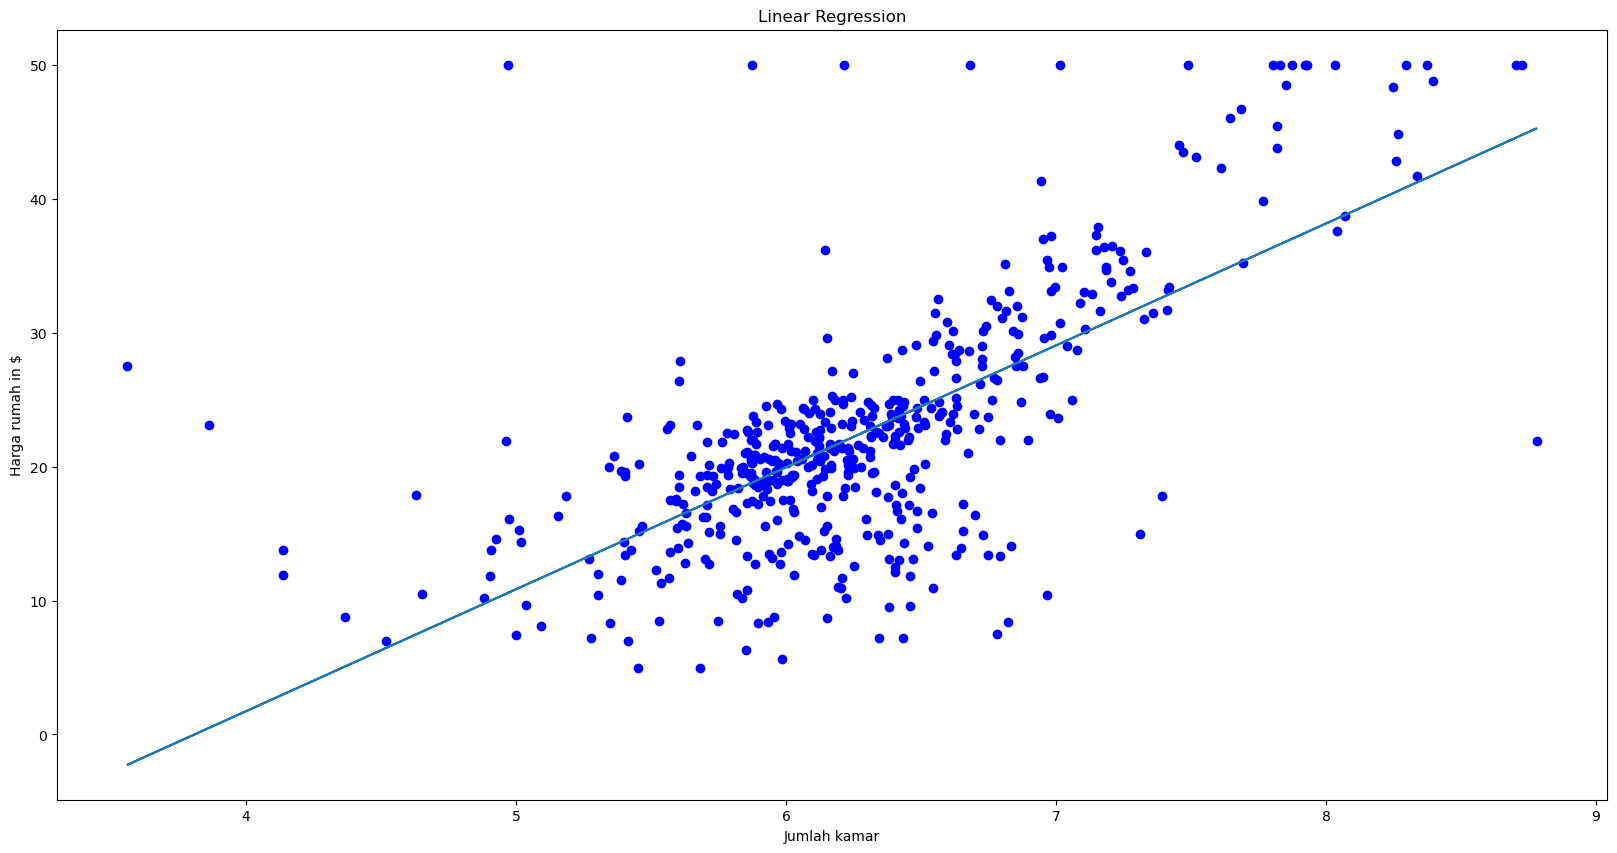

In [101]:
plt.figure(figsize=(20, 10))
plt.scatter(RM, MEDV, color='blue')
plt.plot(RM, lreg)
plt.title('Linear Regression')
plt.xlabel('Jumlah kamar')
plt.ylabel('Harga rumah in $')
plt.show()

In [110]:
df_predict = pd.DataFrame({'RM':RM.astype(int), 'MEDV':lreg})
df_predict

,RM,MEDV
0,6,29.822595
1,6,25.870390
2,7,30.725142
3,6,31.760696
4,7,29.490078
...,...,...
501,6,25.366864
502,6,25.927393
503,6,29.195563
504,6,28.397521


In [112]:
df_predict.to_csv('24-033_Fayiz Afif_Gelombang A_Data Hasil Prediksi.csv')

Kesimpulan yang dapat diambil dari visualisasi linear regression untuk jumlah kamar dan harga rumah adalah hubungan positif antara jumlah kamar (RM) dan harga rumah (MEDV) yang berarti bahwa seiring bertambahnya jumlah kamar, harga median rumah cenderung meningkat. Meskipun ada tren positif yang jelas, ada juga banyak variabilitas dalam data. Ini terlihat dari sebaran titik-titik di sekitar garis regresi. Beberapa rumah dengan jumlah kamar yang sama memiliki harga yang sangat berbeda, menunjukkan bahwa faktor lain juga mempengaruhi harga rumah. Menunjukkan bahwa jumlah kamar merupakan faktor penting dalam menentukan harga rumah di Boston. Namun, penting untuk diingat bahwa meskipun ada hubungan yang kuat, ada banyak faktor lain yang juga dapat mempengaruhi harga rumah

In [109]:
LSTAT = df['LSTAT'].to_numpy().astype(float)
MEDV= df['MEDV'].to_numpy().astype(float)
print(f'Nilai dari persentase status sosial rendah  adalah: \n {LSTAT}')
print(f'Nilai dari rumah adalah: \n {MEDV}')

Nilai dari persentase status sosial rendah  adalah: 
 [ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1  20.45 13.27
 15.71  8.26 10.26  8.47  6.58 14.67 11.69 11.28 21.02 13.83 18.72 19.88
 16.3  16.51 14.81 17.28 12.8  11.98 22.6  13.04 27.71 18.35 20.34  9.68
 11.41  8.77 10.13  4.32  1.98  4.84  5.81  7.44  9.55 10.21 14.15 18.8
 30.81 16.2  13.45  9.43  5.28  8.43 14.8   4.81  5.77  3.95  6.86  9.22
 13.15 14.44  6.73  9.5   8.05  4.67 10.24  8.1  13.09  8.79  6.72  9.88
  5.52  7.54  6.78  8.94 11.97 10.27 12.34  9.1   5.29  7.22  6.72  7.51
  9.62  6.53 12.86  8.44  5.5   5.7   8.81  8.2   8.16  6.21 10.59  6.65
 11.34  4.21  3.57  6.19  9.42  7.67 10.63 13.44 12.33 16.47 18.66 14.09
 12.27 15.55 13.   10.16 16.21 17.09 10.45 15.76 12.04 10.3  15.37 13.61
 14.37 14.27 17.93 25.41 17.58 14.81 27.26 17.19 15.39 18.34 12.6  12.26
 11.12 15.03 17.31 16.96 16.9  14.59 21.32 18.46 24.16 34.41 26.82 26.42
 29.29 27.8  16.65 29.53 28.32 21.45 14.1  13.28 12.12 15.79 15.12 15.0

In [90]:
max_LSTAT = max(LSTAT)
min_LSTAT = min(LSTAT)
range_min_max = max_LSTAT - min_LSTAT
print(f' Jangkauan nilai persentase status sosial rendah adalah {range_min_max}')

 Jangkauan nilai persentase status sosial rendah adalah 36.24


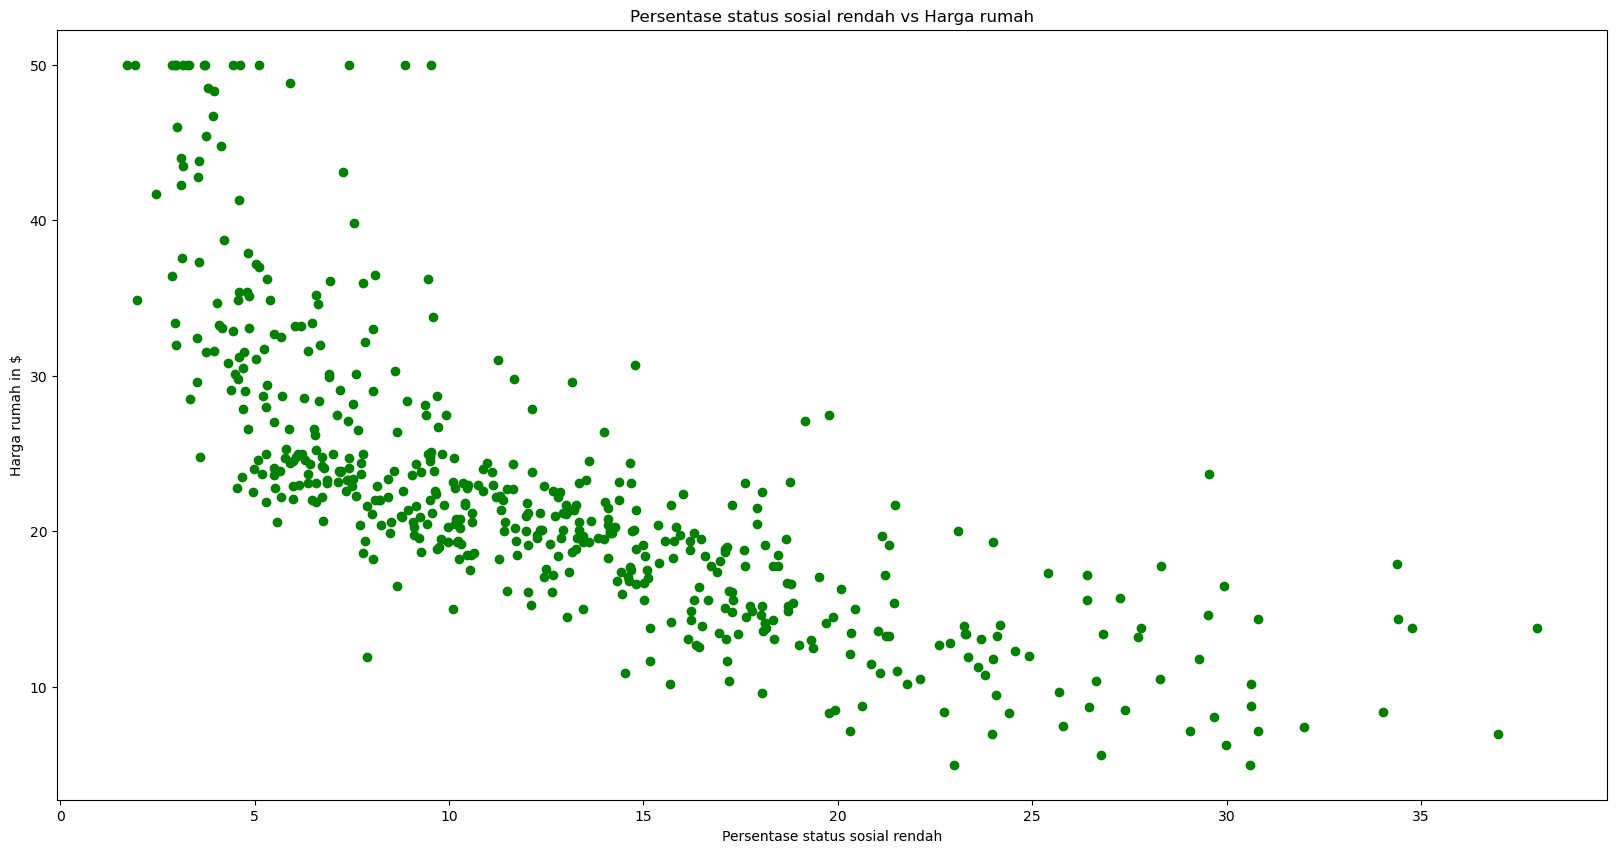

In [95]:
plt.figure(figsize=(20, 10))
plt.scatter(LSTAT, MEDV, marker='o', c='green')
plt.title('Persentase status sosial rendah vs Harga rumah')
plt.xlabel('Persentase status sosial rendah')
plt.ylabel('Harga rumah in $')
plt.show()

In [96]:
LSTAT_norm, mean, std = Z_Score(LSTAT)
print(f' Hasil normalisasi persentase status sosial rendah adalah \n {LSTAT_norm}\n',
      f' Rata-rata persentase status sosial rendah adalah {mean}\n',
      f'Standar deviasi persentase status sosial rendah adalah {std}')

 Hasil normalisasi persentase status sosial rendah adalah 
 [-1.07556230e+00 -4.92439366e-01 -1.20872740e+00 -1.36151682e+00
 -1.02650148e+00 -1.04332233e+00 -3.12676184e-02  9.10700206e-01
  2.42177359e+00  6.23343950e-01  1.09292612e+00  8.64783596e-02
  4.28502391e-01 -6.15792295e-01 -3.35444728e-01 -5.86355801e-01
 -8.51284251e-01  2.82721656e-01 -1.34996218e-01 -1.92467469e-01
  1.17282518e+00  1.64975678e-01  8.50425479e-01  1.01302707e+00
  5.11204923e-01  5.40641418e-01  3.02345986e-01  6.48575231e-01
  2.05966814e-02 -9.43458210e-02  1.39429976e+00  5.42383894e-02
  2.11058779e+00  7.98561179e-01  1.07750701e+00 -4.16745523e-01
 -1.74244877e-01 -5.44303666e-01 -3.53667320e-01 -1.16807700e+00
 -1.49608365e+00 -1.09518663e+00 -9.59218064e-01 -7.30734797e-01
 -4.34968115e-01 -3.42453418e-01  2.09831289e-01  8.61639382e-01
  2.54512652e+00  4.97187545e-01  1.11709641e-01 -4.51788969e-01
 -1.03351017e+00 -5.91962752e-01  3.00944248e-01 -1.09939185e+00
 -9.64825016e-01 -1.21994130e+

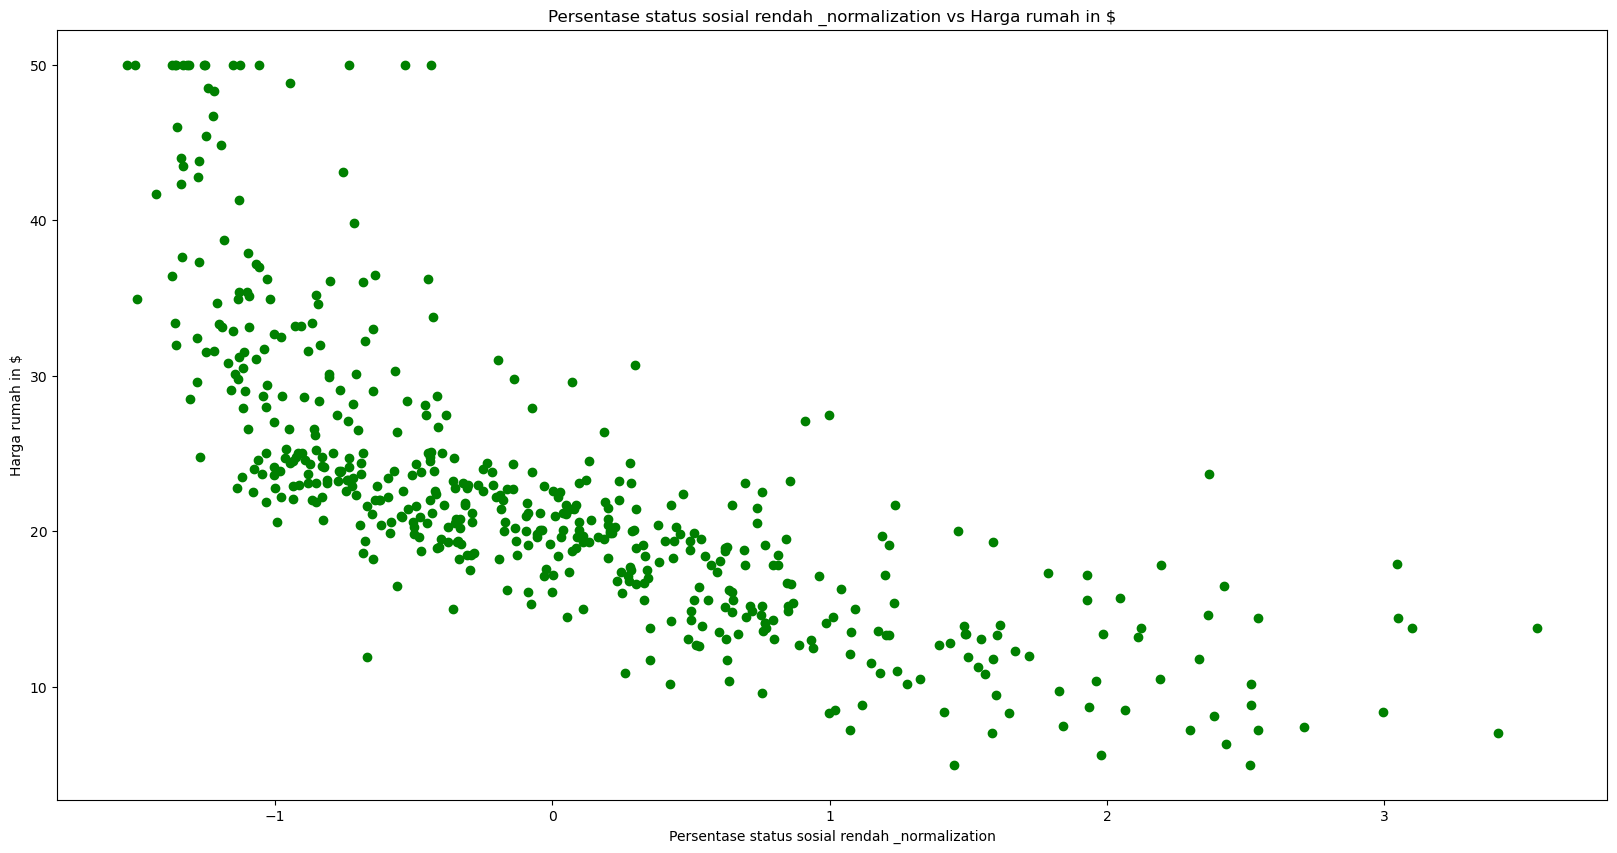

In [107]:
plt.figure(figsize=(20, 10))
plt.scatter(LSTAT_norm, MEDV, color='green')
plt.title('Persentase status sosial rendah _normalization vs Harga rumah in $')
plt.xlabel('Persentase status sosial rendah _normalization')
plt.ylabel('Harga rumah in $')
plt.show()

In [102]:
Persentase_status_sosial_rendah_norm_reshape = LSTAT_norm.reshape(-1,1)
reg = LinearRegression()
reg.fit(Persentase_status_sosial_rendah_norm_reshape, MEDV)
w_final = reg.coef_
b_final = reg.intercept_
print(f'w = {w_final}')
print(f'b = {b_final}')
print(reg)

w = [-6.77765364]
b = 22.532806324110673
LinearRegression()


In [103]:
lreg = linear_regression_function(LSTAT_norm, w_final, b_final)
print(lreg)

[29.8225951  25.87038979 30.72514198 31.76069578 29.49007782 29.60408375
 22.74472741 16.36039575  6.11886372 18.30799693 15.1253316  21.94668596
 19.62856553 26.70643322 24.80633451 26.50692285 28.30251613 20.61661686
 23.44776393 23.83728417 14.58380346 21.41465832 16.76891698 15.66685973
 19.06803641 18.86852605 20.48360995 18.13698805 22.39320915 23.17224962
 13.08272548 22.16519731  8.22797329 17.12043524 15.22983702 25.35736314
 23.71377775 26.22190805 24.92984093 30.44962767 32.67274316 29.95560201
 29.03405413 27.48547369 25.48086955 24.85383698 21.11064252 16.69291303
  5.28282029 19.16304135 21.77567707 25.59487547 29.53758029 26.54492483
 20.49311044 29.98410349 29.07205611 30.80114593 28.03650231 25.79438584
 22.06069188 20.83512821 28.16000873 25.52837202 26.90594358 30.1171104
 24.8253355  26.85844111 22.11769484 26.20290706 28.16950922 25.16735326
 29.30956845 27.39046875 28.11250626 26.06039966 23.18175011 24.79683402
 22.83023185 25.90839176 29.5280798  27.69448455 28.

In [104]:
print(f'Hasil cost function adalah: {cost_function(LSTAT, MEDV, w_final, b_final)}')

Hasil cost function adalah: [4560.67014072]


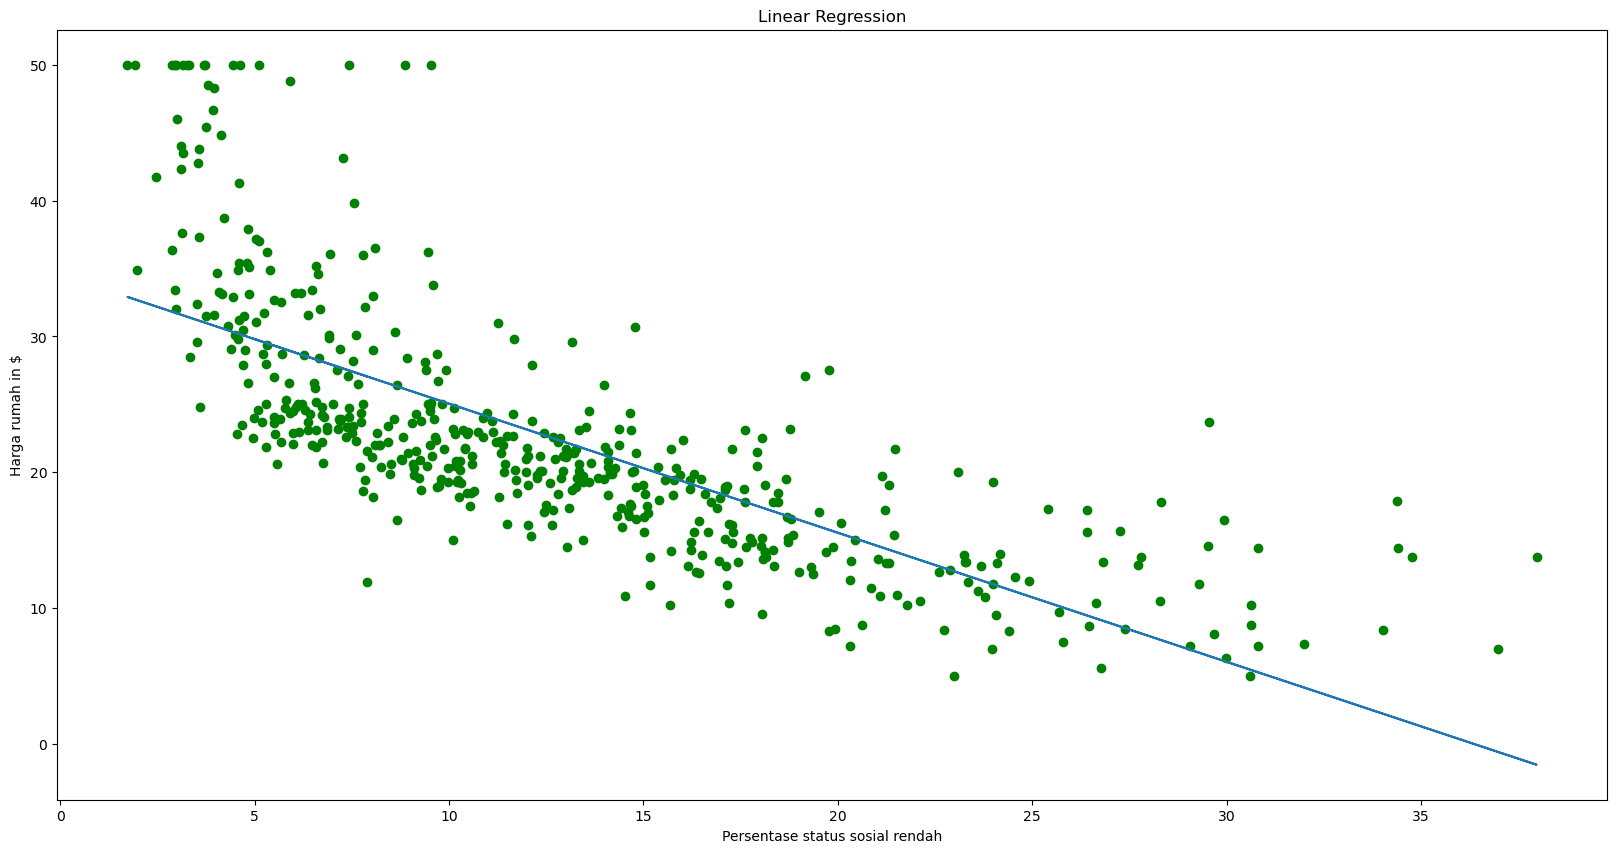

In [106]:
plt.figure(figsize=(20, 10))
plt.scatter(LSTAT, MEDV, color='green')
plt.plot(LSTAT, lreg)
plt.title('Linear Regression')
plt.xlabel('Persentase status sosial rendah')
plt.ylabel('Harga rumah in $')
plt.show()

In [108]:
df_predict = pd.DataFrame({'LSTAT':LSTAT.astype(int), 'MEDV':lreg})
df_predict

,LSTAT,MEDV
0,4,29.822595
1,9,25.870390
2,4,30.725142
3,2,31.760696
4,5,29.490078
...,...,...
501,9,25.366864
502,9,25.927393
503,5,29.195563
504,6,28.397521


Kesimpulan yang dapat diambil dari visualisasi linear regression untuk persentase status sosial rendah (LSTAT) dan Harga rumah (MEDV) terlihat bahwa ada hubungan negatif, ini berarti bahwa semakin tinggi persentase populasi berstatus rendah, semakin rendah harga median rumah. Meskipun ada tren negatif yang jelas, terdapat variabilitas yang signifikan dalam data. Beberapa rumah dengan persentase LSTAT yang sama memiliki harga yang sangat berbeda, menunjukkan bahwa ada faktor lain yang juga mempengaruhi harga rumah. Analisis linear regression menunjukkan bahwa persentase populasi berstatus rendah merupakan faktor penting dalam menentukan harga rumah di Boston. Hubungan negatif yang kuat antara kedua variabel ini mengindikasikan bahwa daerah dengan populasi berstatus rendah cenderung memiliki harga rumah yang lebih rendah. Namun, penting untuk diingat bahwa meskipun ada hubungan yang signifikan, masih banyak faktor lain yang dapat mempengaruhi harga rumah

Kesimpulan yang saya dapatkan setelah melakukan analisis secara mendalam pada dataset boston housing, sebagai berikut.
1. Terdapat Faktor-Faktor yang Mempengaruhi Harga Rumah, variabel yang memiliki korelasi positif kuat dengan MEDV yaitu RM (jumlah kamar) terlihat bahwa ada hubungan positif yang kuat antara jumlah kamar dan harga rumah. Ketika jumlah kamar (RM) meningkat, harga rumah (MEDV) juga cenderung meningkat. Ini menunjukkan bahwa rumah dengan lebih banyak kamar biasanya memiliki harga yang lebih tinggi. Hal ini mungkin mencerminkan permintaan yang lebih besar untuk rumah yang lebih besar, yang biasanya lebih dihargai di pasar perumahan. Dan variabel dengan korelasi negatif yang kuat dengan MEDV yakni LSTAT (status sosial ekonomi rendah) menunjukkan hubungan negatif yang jelas. Ketika persentase populasi berstatus rendah (LSTAT) meningkat, harga rumah (MEDV) cenderung menurun. Ini menunjukkan bahwa daerah dengan lebih banyak populasi berstatus rendah cenderung memiliki harga rumah yang lebih rendah. Hal ini mungkin mencerminkan faktor-faktor sosial dan ekonomi yang mempengaruhi nilai properti, di mana daerah dengan lebih banyak permasalahan berkaitan ekonomi mungkin memiliki harga rumah yang lebih rendah.
2. Meskipun ada tren yang jelas antara variabel-variabel tersebut, terdapat variabilitas yang signifikan dalam harga rumah. Hal ini menunjukkan bahwa banyak faktor lain, termasuk lokasi, kondisi properti, dan faktor ekonomi lokal, juga berkontribusi pada harga rumah.
3. Terdapat beberapa outlier dalam dataset yang menunjukkan rumah dengan harga jauh lebih tinggi atau lebih rendah dibandingkan dengan yang lain. Ini dapat mempengaruhi analisis dan model prediktif, sehingga penting untuk mempertimbangkan penanganan outlier saat membangun model.
4. Dataset ini hanya mencakup informasi tentang properti di Boston dan mungkin tidak mencakup semua faktor yang mempengaruhi harga rumah di daerah lain. Oleh karena itu, hasil analisis ini lebih relevan untuk konteks Boston dan tidak selalu dapat digeneralisasi ke daerah lain.
5. Temuan dari analisis ini dapat digunakan untuk membantu pembuat kebijakan dan perencana kota dalam memahami dinamika pasar perumahan, merumuskan kebijakan perumahan yang lebih baik, dan mengidentifikasi area yang mungkin memerlukan perhatian khusus dalam hal pengembangan dan investasi.
   Boston Housing Dataset memberikan wawasan yang berharga tentang faktor-faktor yang mempengaruhi harga rumah di wilayah tersebut. Dengan analisis yang tepat, dataset ini dapat digunakan untuk membangun model prediktif yang membantu dalam pengambilan keputusan terkait investasi properti, perencanaan kota, dan kebijakan perumahan. Namun, penting untuk melanjutkan penelitian dengan mempertimbangkan faktor-faktor eksternal dan variabel lain yang mungkin mempengaruhi pasar perumahan secara keseluruhan.